In [1]:
!if [ ! -f ./data/Country-data.csv ]; \
then \
curl -L -o unsupervised-learning-on-country-data.zip https://www.kaggle.com/api/v1/datasets/download/rohan0301/unsupervised-learning-on-country-data; \
unzip unsupervised-learning-on-country-data.zip; \
rm unsupervised-learning-on-country-data.zip; \
mv ./Country-data.csv ./data/Country-data.csv; \
mv ./data-dictionary.csv ./data/data-dictionary.csv; \
fi

In [87]:
# Importa le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carica i dataset
data = pd.read_csv('./data/Country-data.csv')
data_dict = pd.read_csv('./data/data-dictionary.csv')

# Visualizza le prime righe del dataset
print("Prime righe del dataset:")
display(data.head())

# Visualizza il dizionario dati
print("\nDizionario dati:")
display(data_dict)

# Ottieni le feature numeriche
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Ottieni le feature categoriche
categorical_features = data.select_dtypes(include=[object]).columns.tolist()

Prime righe del dataset:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



Dizionario dati:


,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [88]:
# Informazioni generali sul dataset
print("\nInformazioni sul dataset:")
data.info()

# Statistiche descrittive
print("\nStatistiche descrittive:")
display(data.describe())

# Controlla valori nulli o mancanti
print("\nValori nulli nel dataset:")
print(data.isnull().sum())


Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB

Statistiche descrittive:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000



Valori nulli nel dataset:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



Distribuzione delle variabili numeriche:


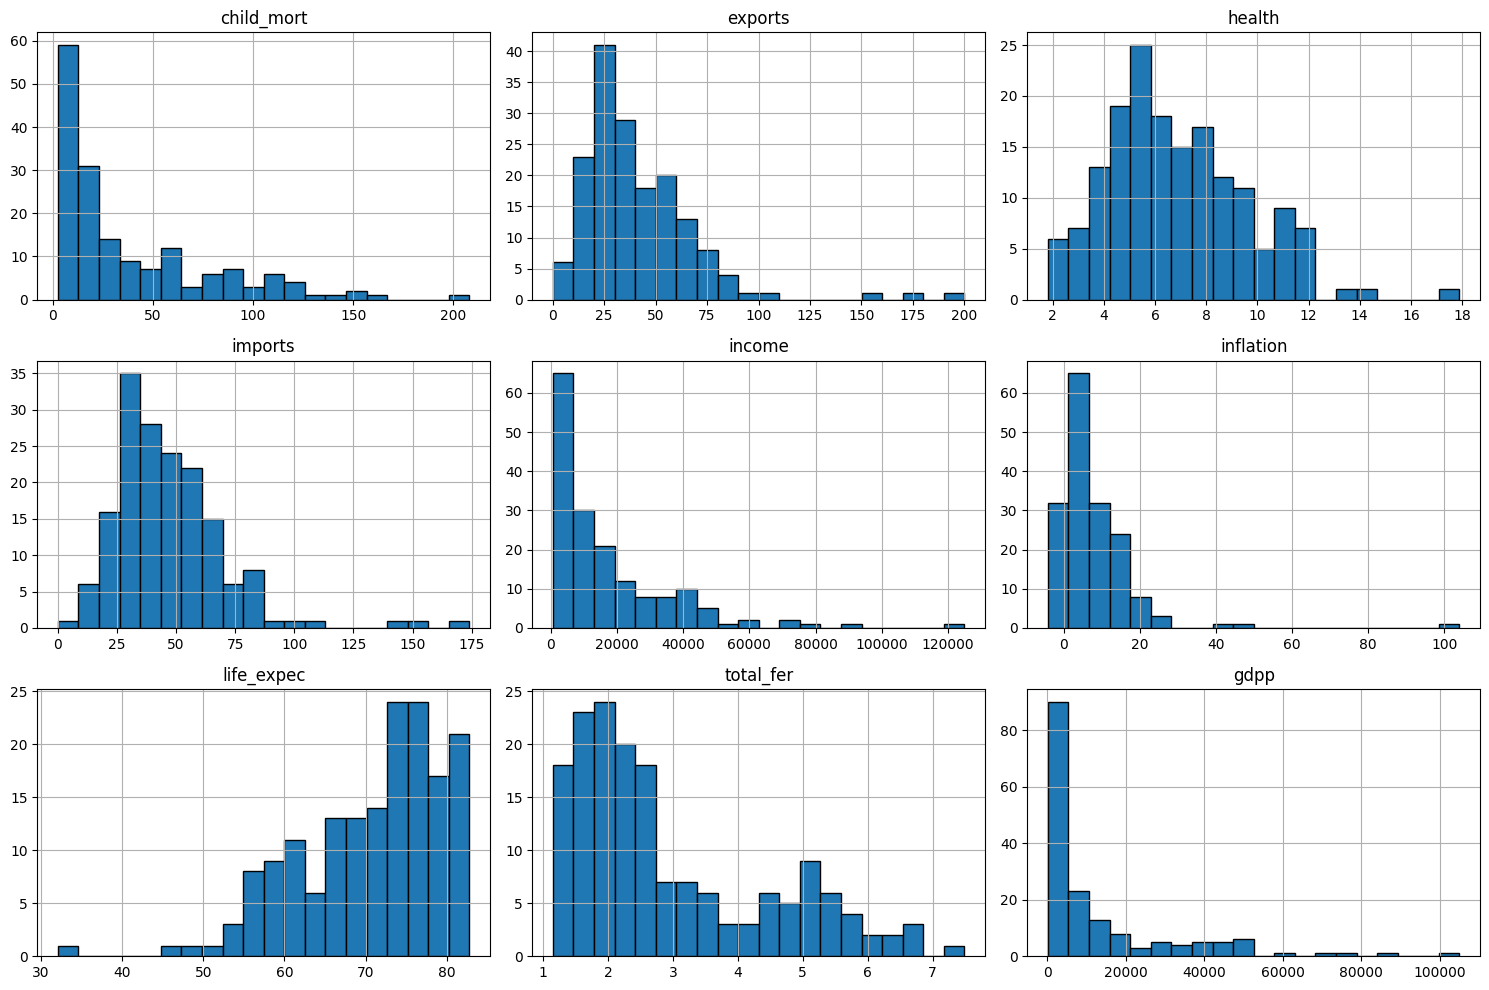


Matrice di correlazione:


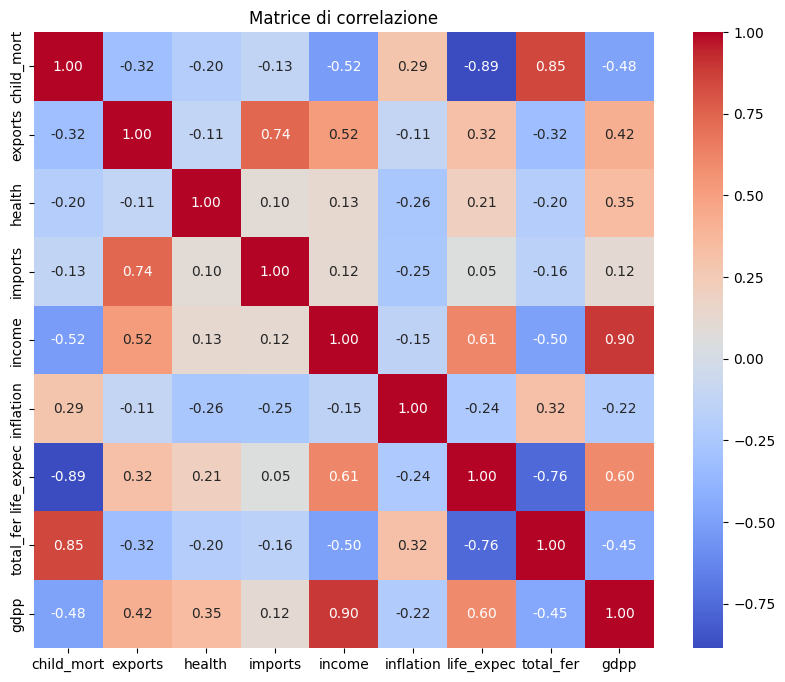

In [90]:
# Distribuzione dei valori numerici
print("\nDistribuzione delle variabili numeriche:")
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

# Matrice di correlazione
print("\nMatrice di correlazione:")
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice di correlazione')
plt.show()

## Dimensionality Reduction - PCA

In [91]:
data[numerical_features]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [92]:
from pca import PCA

pca = PCA(n_components=2)
pca.fit(data[numerical_features])

# Visualizza i componenti principali
print("\nComponenti principali:")
display(pca.components_)
print("\nVarianza spiegata:")
display(pca.explained_variance_)
print("\nVarianza spiegata percentuale:")
display(pca.get_explained_variance_ratio())


Componenti principali:


array([[ 0.41951945, -0.19288394],
       [-0.28389698, -0.61316349],
       [-0.15083782,  0.24308678],
       [-0.16148244, -0.67182064],
       [-0.39844111, -0.02253553],
       [ 0.19317293,  0.00840447],
       [-0.42583938,  0.22270674],
       [ 0.40372896, -0.15523311],
       [-0.39264482,  0.0460224 ]])


Varianza spiegata:


array([4.16057017, 1.55566165])


Varianza spiegata percentuale:


array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

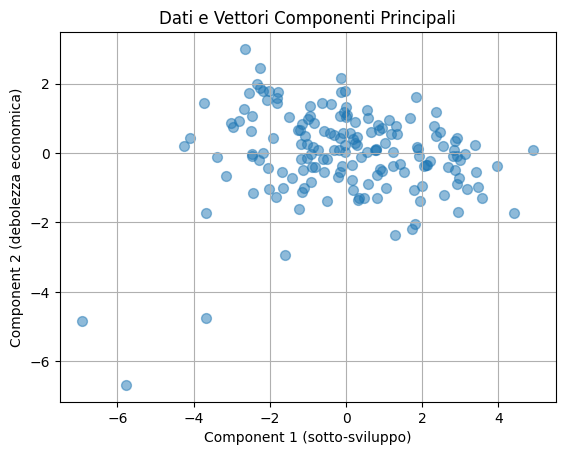

In [93]:
import matplotlib.pyplot as plt

new_data = pca.transform(data[numerical_features])

# Supponiamo che 'data' e 'pca' siano già definiti
plt.scatter(x=new_data[:, 0], y=new_data[:, 1], s=50, alpha=0.5)

# Visualizza i vettori principali con parametri personalizzati per la freccia
scale_factor = 5  # Puoi modificare questo valore per scalare le frecce

plt.title("Dati e Vettori Componenti Principali")
plt.xlabel("Component 1 (sotto-sviluppo)")
plt.ylabel("Component 2 (debolezza economica)")
plt.grid(True)
plt.show()

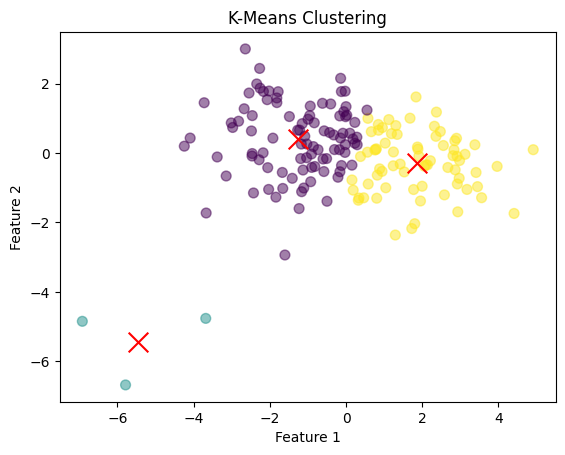

In [94]:
from kmeans import KMeans

model = KMeans(n_clusters=3, max_iter=300, tol=1e-4, kmeanspp=True, random_state=42)
model.fit(new_data)
model.plot_clusters(new_data)

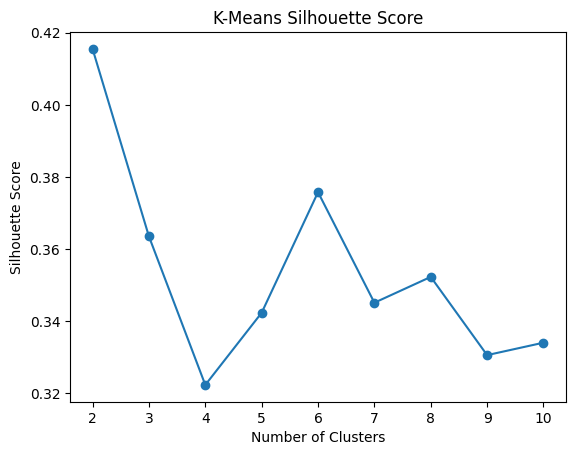

In [95]:
model.plot_silhouette_score(new_data)

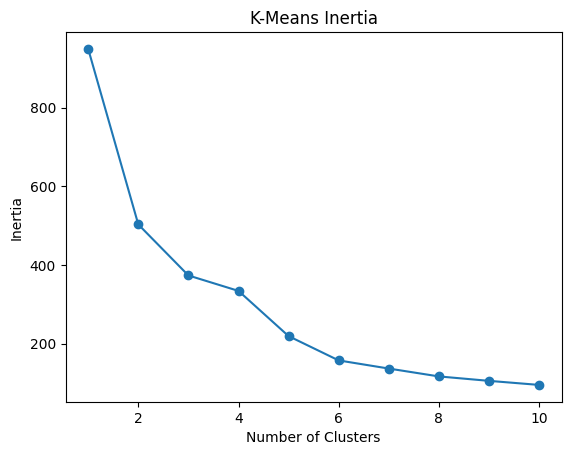

In [96]:
model.plot_elbow(new_data)

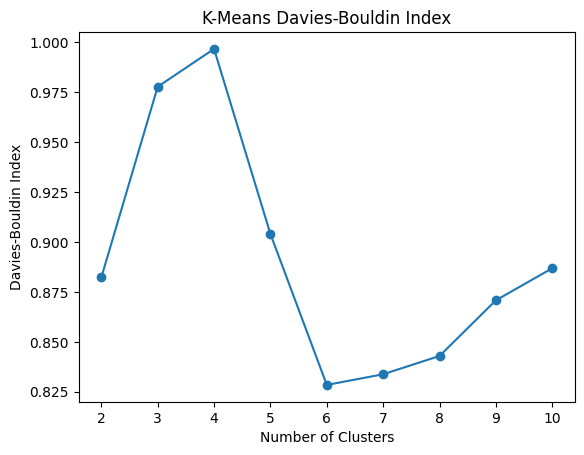

In [97]:
model.plot_dbi(new_data)

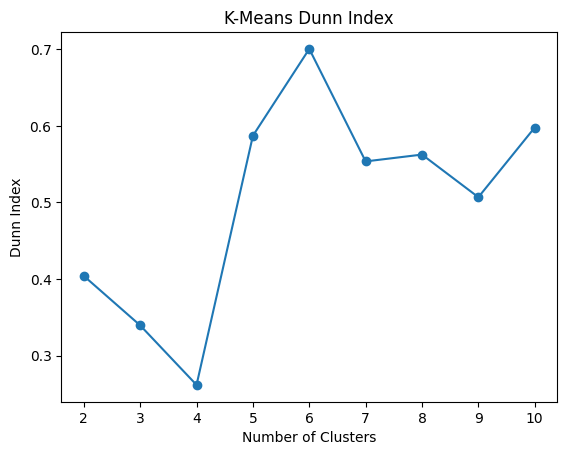

In [98]:
model.plot_dunn_index(new_data)

In [99]:
model.predict(new_data)

array([2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2])

In [100]:
data['class'] = model.predict(new_data)
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [101]:
# Salvataggio del dataset con le classi assegnate in formato CSV
data.to_csv('./data/Country-data-with-classes.csv', index=False)

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  class  
0       9.44        56.2       5.82    553      2  
1       4.49        76.3       1.65   4090      0  
2      16.10        76.5       2.89   4460      0  
3      22.40        60.1       6.16   3530      2  
4       1.44        76.8       2.13  12200      0  
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00         2
           2       0.87      1.00      0.93        13

    accuracy 

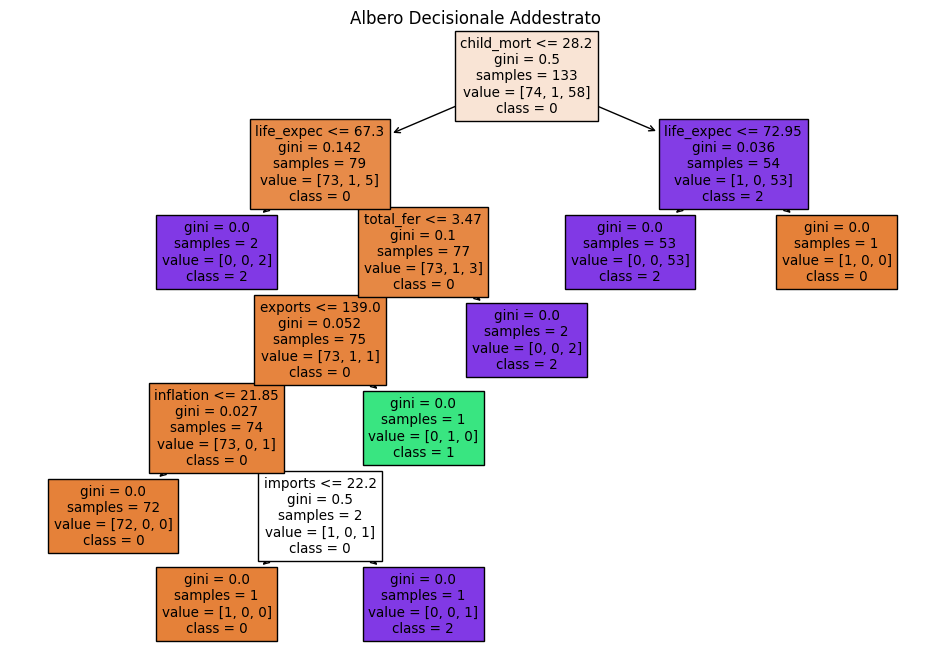

In [102]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Carica il dataset
df = pd.read_csv('./data/Country-data-with-classes.csv')

# Visualizza le prime righe del dataset
print(df.head())

# Seleziona le feature numeriche, escludendo "country" e la colonna target "class"
feature_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 
                'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[feature_cols]
y = df['class']

# Dividi il dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Effettua le predizioni sul test set
y_pred = clf.predict(X_test)

# Calcola e stampa il classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualizza l'albero decisionale
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_cols, class_names=['0', '1', '2'], filled=True)
plt.title("Albero Decisionale Addestrato")
plt.show()

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  class  
0       9.44        56.2       5.82    553      2  
1       4.49        76.3       1.65   4090      0  
2      16.10        76.5       2.89   4460      0  
3      22.40        60.1       6.16   3530      2  
4       1.44        76.8       2.13  12200      0  
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.50      0.67         2
           2       0.93      1.00      0.96        13

    accuracy 

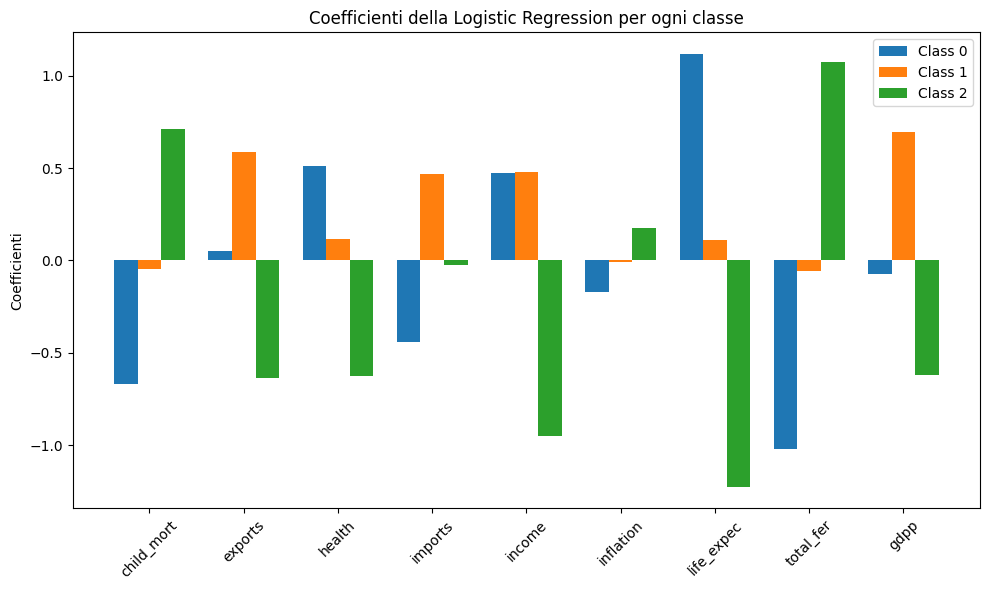

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Carica il dataset
df = pd.read_csv('./data/Country-data-with-classes.csv')

# Visualizza le prime righe del dataset
print(df.head())

# Seleziona le feature numeriche (escludendo 'country') e il target 'class'
feature_cols = ['child_mort', 'exports', 'health', 'imports', 'income', 
                'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[feature_cols]
y = df['class']

# È buona pratica standardizzare le feature per la Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividi il dataset in train e test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crea e addestra il modello di Logistic Regression
# Nel caso di classificazione multiclasse, scikit-learn utilizza per default il metodo 'ovr' (one-vs-rest),
# oppure puoi impostare multi_class='multinomial' se preferisci, insieme a solver come 'lbfgs'.
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

# Effettua le predizioni sul test set
y_pred = clf.predict(X_test)

# Calcola e stampa il classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# (Opzionale) Visualizza i coefficienti del modello per interpretare l'importanza relativa delle feature
# I coefficienti sono disponibili in clf.coef_ e hanno forma (n_classi, n_features)
coef = clf.coef_
classes = clf.classes_

# Per ogni classe, stampiamo i coefficienti associati ad ogni feature
for idx, class_label in enumerate(classes):
    print(f"\nCoefficienti per la classe {class_label}:")
    for feat, c in zip(feature_cols, coef[idx]):
        print(f"  {feat}: {c:.4f}")

# (Opzionale) Visualizzazione grafica dei coefficienti per ogni classe
import numpy as np
x_pos = np.arange(len(feature_cols))
width = 0.25

plt.figure(figsize=(10, 6))
for idx, class_label in enumerate(classes):
    plt.bar(x_pos + idx*width, coef[idx], width, label=f"Class {class_label}")
plt.xticks(x_pos + width, feature_cols, rotation=45)
plt.ylabel("Coefficienti")
plt.title("Coefficienti della Logistic Regression per ogni classe")
plt.legend()
plt.tight_layout()
plt.show()